In [48]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import DistanceMetric
from gp_mjo.gp_mjo_model import rolling

In [97]:
npzfile = np.load('../data/mjo_new_data.npz', allow_pickle=True)
print(npzfile.files)
print(npzfile['RMM1'].shape)

['year', 'month', 'day', 'RMM1', 'RMM2', 'phase', 'amplitude']
(16026,)


## Entire

In [133]:
width = 40
lead_time = 0
start_train = 0
n_train = width + 30 - 1
start_test = start_train + n_train

x1 = rolling(npzfile['RMM1'][start_train : start_train + n_train], width)
x2 = rolling(npzfile['RMM2'][start_train : start_train + n_train], width)
x = np.vstack((x1,x2))
xstar1 = rolling(npzfile['RMM1'][start_test : start_test + width + lead_time], width)
xstar2 = rolling(npzfile['RMM2'][start_test : start_test + width + lead_time], width)
xstar = np.vstack((xstar1, xstar2))
x_joint = np.vstack((xstar,x))

y1 = npzfile['RMM1'][start_train + width : start_train + n_train]
y2 = npzfile['RMM2'][start_train : start_train + n_train]
x = np.vstack((x1,x2))
xstar1 = rolling(npzfile['RMM1'][start_test : start_test + width + lead_time], width)
xstar2 = rolling(npzfile['RMM2'][start_test : start_test + width + lead_time], width)
xstar = np.vstack((xstar1, xstar2))
x_joint = np.vstack((xstar,x))


print(xstar.shape)
print(x.shape)
print(x_joint.shape)


(2, 40)
(60, 40)
(62, 40)


In [130]:
emp_jointmean = np.mean(x_joint)
emp_jointcov = np.cov(x_joint)
print(emp_jointcov.shape)

n_test = xstar.shape[0]
n_train = x.shape[0]
K11 = emp_jointcov[:n_test, :n_test]
K12 = emp_jointcov[:n_test, n_test:]
K21  = emp_jointcov[n_test:, :n_test]
K22  = emp_jointcov[n_test:, n_test:]
#emp_postmean = 
#emp_postcov = 

dist = DistanceMetric.get_metric('euclidean')
dist_joint = dist.pairwise(x_joint)
print(dist_joint.shape)

(62, 62)
(62, 62)


(1953,)
(1953,)


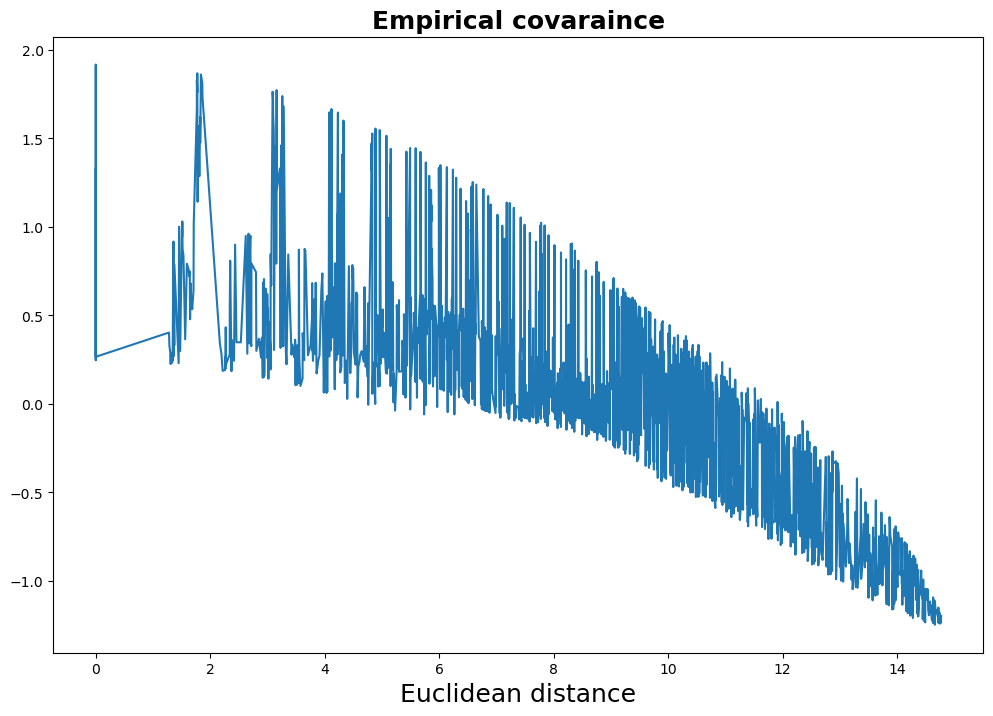

In [131]:
iu = np.triu_indices(len(dist_joint))
dist_joint_unfold = dist_joint[iu]
emp_jointcov_unfold = emp_jointcov[iu]
print(dist_joint_unfold.shape)
print(emp_jointcov_unfold.shape)

arrind = dist_joint_unfold.argsort()
sorted_dist_joint = dist_joint_unfold[arrind]
sorted_emp_jointcov = emp_jointcov_unfold[arrind]

plt.figure(figsize=(12,8))
plt.plot(sorted_dist_joint, sorted_emp_jointcov)
plt.xlabel('Euclidean distance', fontsize=18)
#plt.ylabel('Empirical covaraince', fontsize=18)
plt.title('Empirical covaraince', fontsize=18, fontweight="bold")
plt.show()

## Season